## **Network Intrusion Detection System**

- UGR Network Dataset

Perform the project as follows;
- Machine Learning Models
  - UnSupervised. GAN
     
      - Anomaly Detection

In [ ]:
import os

import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# import shap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


the code implementing a Generative Adversarial Network (GAN) for generating synthetic network flow data:

In [ ]:
import pandas as pd
import numpy as np
import socket
import struct
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the normal and abnormal datasets
normal_df_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/background_sampleAD.csv'
abnormal_df_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/labeled_samples.csv'

normal_df = pd.read_csv(normal_df_path)
abnormal_df = pd.read_csv(abnormal_df_path)
# Drop 'label' column if it exists

# Drop 'label' and 'bin_label' columns
columns_to_drop = ['label', 'bin_label']
normal_df.drop(columns=columns_to_drop, errors='ignore', inplace=True)
abnormal_df.drop(columns=columns_to_drop, errors='ignore', inplace=True)

# Drop 'date_time' column if it exists
if 'date_time' in normal_df.columns:
    normal_df.drop(columns=['date_time'], inplace=True)
if 'date_time' in abnormal_df.columns:
    abnormal_df.drop(columns=['date_time'], inplace=True)
# Drop 'date_time' column from both datasets if it exists
normal_df.drop(columns=['date_time'], errors='ignore', inplace=True)
abnormal_df.drop(columns=['date_time'], errors='ignore', inplace=True)
# Drop 'label' column if it exists
if 'label' in normal_df.columns:
    normal_df.drop(columns=['label'], inplace=True)
if 'label' in abnormal_df.columns:
    abnormal_df.drop(columns=['label'], inplace=True)


# Sample 10,000 instances each from normal and abnormal datasets
normal_df = normal_df.sample(n=10000, replace=True, random_state=42)
abnormal_df = abnormal_df.sample(n=10000, replace=True, random_state=42)

# Function to convert IP addresses from string to integer
def ip_to_int(ip):
    # Convert IP address from string to binary format
    packed_ip = socket.inet_aton(ip)
    # Unpack binary IP and return as integer
    return struct.unpack("!I", packed_ip)[0]

# Apply IP conversion function to 'source_ip' and 'destination_ip' in both datasets
for df in [normal_df, abnormal_df]:
    df['source_ip'] = df['source_ip'].apply(ip_to_int)
    df['destination_ip'] = df['destination_ip'].apply(ip_to_int)

# Categorical features to be encoded
categorical_features = ['protocol', 'flag']

# Initialize mappings dictionary
mappings = {}

# Perform label encoding for categorical features and store mappings
for feature in categorical_features:
    # Create a LabelEncoder object
    label_encoder = LabelEncoder()
    # Fit and transform the feature in normal_samples and abnormal_samples
    normal_df[feature] = label_encoder.fit_transform(normal_df[feature])
    abnormal_df[feature] = label_encoder.fit_transform(abnormal_df[feature])
    # Store the mapping for later use
    mappings[feature] = {label: index for index, label in enumerate(label_encoder.classes_)}

# Save mappings for later use
#dump(mappings, '/content/drive/MyDrive/azizah_alqahtani_project/new codes/mappings.joblib')
# Save mappings to a text file
with open("mappings.txt", "w") as f:
    for feature, mapping in mappings.items():
        f.write(f"Encoding for {feature}: {mapping}\n")

# Define numerical features to be scaled
numerical_features = ['duration', 'source_ip', 'destination_ip', 'source_port', 'destination_port', 'tos', 'packets', 'bytes']

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features in normal samples
normal_df[numerical_features] = scaler.fit_transform(normal_df[numerical_features])

# Transform the numerical features in abnormal samples using the same scaler
abnormal_df[numerical_features] = scaler.transform(abnormal_df[numerical_features])

# Print the first few rows of the scaled numerical features in normal samples
print("First few rows of scaled numerical features in normal samples:")
print(normal_df[numerical_features].head())

# Print the first few rows of the scaled numerical features in abnormal samples
print("First few rows of scaled numerical features in abnormal samples:")
print(abnormal_df[numerical_features].head())


First few rows of scaled numerical features in normal samples:
       duration  source_ip  destination_ip  source_port  destination_port  \
7270   0.216866  -0.726996        1.111683    -0.979601          1.220118   
860   -0.017351  -0.726997        1.874504    -0.979601          1.445179   
5390  -0.183984   1.726764       -0.752542    -0.628624         -0.853706   
13418 -0.188318  -0.726997        0.968175    -0.979601          1.010505   
5191  -0.143048   1.484821       -0.752541    -0.996916          1.060217   

           tos   packets     bytes  
7270  -0.39839 -0.049746 -0.040463  
860   -0.39839 -0.049746 -0.035272  
5390  -0.39839 -0.028480 -0.045811  
13418 -0.39839 -0.086960 -0.051720  
5191  -0.39839  0.061898 -0.024884  
First few rows of scaled numerical features in abnormal samples:
       duration  source_ip  destination_ip  source_port  destination_port  \
7270  -0.159422  -0.726997        1.483020     0.615767         -0.855965   
860   -0.188318   0.761452       

In [ ]:
normal_df.head()


,duration,source_ip,destination_ip,source_port,destination_port,protocol,flag,forwarding_status,tos,packets,bytes
7270,0.216866,-0.726996,1.111683,-0.979601,1.220118,4,14,0,-0.39839,-0.049746,-0.040463
860,-0.017351,-0.726997,1.874504,-0.979601,1.445179,4,14,0,-0.39839,-0.049746,-0.035272
5390,-0.183984,1.726764,-0.752542,-0.628624,-0.853706,4,14,0,-0.39839,-0.028480,-0.045811
13418,-0.188318,-0.726997,0.968175,-0.979601,1.010505,4,1,0,-0.39839,-0.086960,-0.051720
5191,-0.143048,1.484821,-0.752541,-0.996916,1.060217,4,14,0,-0.39839,0.061898,-0.024884


In [ ]:
abnormal_df.head()

,duration,source_ip,destination_ip,source_port,destination_port,protocol,flag,forwarding_status,tos,packets,bytes
7270,-0.159422,-0.726997,1.483020,0.615767,-0.855965,1,17,0,-0.39839,-0.060378,-0.049708
860,-0.188318,0.761452,-0.752541,-0.995756,0.690538,2,4,0,-0.39839,-0.086960,-0.051479
5390,-0.167449,-0.553561,-0.752541,-0.996916,0.591484,1,14,0,-0.39839,-0.065695,-0.046895
13418,-0.188318,-0.726996,1.522679,-0.995756,1.777512,2,4,0,-0.39839,-0.086960,-0.051023
5191,0.169388,-0.726996,-0.419903,-0.916804,-0.855965,1,1,0,-0.39839,-0.060378,-0.050421


# **Anomaly Detection**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.callbacks import EarlyStopping

**Autoencoders**

NOTE: you can play with changin the epochs, batch_size, and encoding_dim parameters to enhance the performance of model.

In [ ]:
normal_df.shape

(10000, 11)

In [ ]:
abnormal_df.shape

(10000, 11)

**Evaluation**
Evaluate the model by calculating the reconstruction error on the test set.

In [ ]:
import pandas as pd
import numpy as np
import socket
import struct
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam
from joblib import dump
import matplotlib.pyplot as plt

# Load the normal and abnormal datasets
normal_df_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/background_sampleAD.csv'
abnormal_df_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/labeled_samples.csv'

normal_df = pd.read_csv(normal_df_path)
abnormal_df = pd.read_csv(abnormal_df_path)

# Drop 'label' and 'bin_label' columns
columns_to_drop = ['label', 'bin_label']
normal_df.drop(columns=columns_to_drop, errors='ignore', inplace=True)
abnormal_df.drop(columns=columns_to_drop, errors='ignore', inplace=True)

# Drop 'date_time' column if it exists
normal_df.drop(columns=['date_time'], errors='ignore', inplace=True)
abnormal_df.drop(columns=['date_time'], errors='ignore', inplace=True)

# Sample 10,000 instances each from normal and abnormal datasets
normal_df = normal_df.sample(n=10000, replace=True, random_state=42)
abnormal_df = abnormal_df.sample(n=10000, replace=True, random_state=42)

# Function to convert IP addresses from string to integer
def ip_to_int(ip):
    packed_ip = socket.inet_aton(ip)
    return struct.unpack("!I", packed_ip)[0]

# Apply IP conversion function to 'source_ip' and 'destination_ip' in both datasets
for df in [normal_df, abnormal_df]:
    df['source_ip'] = df['source_ip'].apply(ip_to_int)
    df['destination_ip'] = df['destination_ip'].apply(ip_to_int)

# Categorical features to be encoded
categorical_features = ['protocol', 'flag']

# Initialize mappings dictionary
mappings = {}

# Perform label encoding for categorical features and store mappings
for feature in categorical_features:
    # Create a LabelEncoder object
    label_encoder = LabelEncoder()
    # Fit and transform the feature in normal_samples and abnormal_samples
    normal_df[feature] = label_encoder.fit_transform(normal_df[feature])
    abnormal_df[feature] = label_encoder.fit_transform(abnormal_df[feature])
    # Store the mapping for later use
    mappings[feature] = {label: index for index, label in enumerate(label_encoder.classes_)}

# Define numerical features to be scaled
numerical_features = ['duration', 'source_ip', 'destination_ip', 'source_port', 'destination_port', 'tos', 'packets', 'bytes']

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features in normal samples
normal_df[numerical_features] = scaler.fit_transform(normal_df[numerical_features])

# Transform the numerical features in abnormal samples using the same scaler
abnormal_df[numerical_features] = scaler.transform(abnormal_df[numerical_features])

# Define the input dimension
input_dim = normal_df.shape[1]

# Define the generator network
generator = Sequential([
    Dense(64, input_shape=(input_dim,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(input_dim, activation='sigmoid')
])

# Define the discriminator network
discriminator = Sequential([
    Dense(64, input_shape=(input_dim,), activation=LeakyReLU(alpha=0.2)),
    Dense(1, activation='sigmoid')
])

# Compile the discriminator
discriminator.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Combine the generator and discriminator into a GAN model
discriminator.trainable = False
gan = Sequential([
    generator,
    discriminator
])

# Compile the GAN model
gan.compile(optimizer=Adam(), loss='binary_crossentropy')

# Train the GAN
batch_size = 32
epochs = 10
for epoch in range(epochs):
    for _ in range(len(normal_df) // batch_size):
        # Train discriminator
        noise = np.random.normal(0, 1, size=(batch_size, input_dim))
        generated_data = generator.predict(noise)
        real_data = normal_df.iloc[np.random.randint(0, len(normal_df), batch_size)]
        combined_data = np.concatenate([real_data, generated_data])
        labels = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])
        discriminator_loss = discriminator.train_on_batch(combined_data, labels)

        # Train generator
        noise = np.random.normal(0, 1, size=(batch_size, input_dim))
        generator_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    # Print progress
    print(f"Epoch {epoch+1}/{epochs}, Discriminator Loss: {discriminator_loss[0]}, Generator Loss: {generator_loss}")

# Save the trained scaler and generator model
scaler_file_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/scaler.joblib'
generator_file_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/generator_model.h5'

# Save the scaler
dump(scaler, scaler_file_path)

# Save the generator model
generator.save(generator_file_path)


1/1 [==============================] - 0s 21ms/step
Epoch 1/10, Discriminator Loss: 0.06807790696620941, Generator Loss: 2.273820638656616
1/1 [==============================] - 0s 25ms/step
Epoch 2/10, Discriminator Loss: 0.00878911092877388, Generator Loss: 4.262433052062988
1/1 [==============================] - 0s 23ms/step
Epoch 3/10, Discriminator Loss: 0.012959867715835571, Generator Loss: 4.77622127532959
1/1 [==============================] - 0s 27ms/step
Epoch 4/10, Discriminator Loss: 0.0020927644800394773, Generator Loss: 5.623058319091797
1/1 [==============================] - 0s 22ms/step
Epoch 5/10, Discriminator Loss: 0.0011027114233002067, Generator Loss: 6.185111045837402
1/1 [==============================] - 0s 39ms/step
Epoch 6/10, Discriminator Loss: 0.002593612764030695, Generator Loss: 6.591521263122559
1/1 [==============================] - 0s 19ms/step
Epoch 7/10, Discriminator Loss: 0.00052610132843256, Generator Loss: 6.88616418838501
1/1 [==================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pandas as pd
import numpy as np
import socket
import struct
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam
from joblib import dump
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Load the normal and abnormal datasets
normal_df_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/background_sampleAD.csv'
abnormal_df_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/labeled_samples.csv'

normal_df = pd.read_csv(normal_df_path)
abnormal_df = pd.read_csv(abnormal_df_path)

# Drop 'label' and 'bin_label' columns
columns_to_drop = ['label', 'bin_label']
normal_df.drop(columns=columns_to_drop, errors='ignore', inplace=True)
abnormal_df.drop(columns=columns_to_drop, errors='ignore', inplace=True)

# Drop 'date_time' column if it exists
normal_df.drop(columns=['date_time'], errors='ignore', inplace=True)
abnormal_df.drop(columns=['date_time'], errors='ignore', inplace=True)

# Sample 10,000 instances each from normal and abnormal datasets
normal_df = normal_df.sample(n=10000, replace=True, random_state=42)
abnormal_df = abnormal_df.sample(n=10000, replace=True, random_state=42)

# Function to convert IP addresses from string to integer
def ip_to_int(ip):
    packed_ip = socket.inet_aton(ip)
    return struct.unpack("!I", packed_ip)[0]

# Apply IP conversion function to 'source_ip' and 'destination_ip' in both datasets
for df in [normal_df, abnormal_df]:
    df['source_ip'] = df['source_ip'].apply(ip_to_int)
    df['destination_ip'] = df['destination_ip'].apply(ip_to_int)

# Categorical features to be encoded
categorical_features = ['protocol', 'flag']

# Initialize mappings dictionary
mappings = {}

# Perform label encoding for categorical features and store mappings
for feature in categorical_features:
    # Create a LabelEncoder object
    label_encoder = LabelEncoder()
    # Fit and transform the feature in normal_samples and abnormal_samples
    normal_df[feature] = label_encoder.fit_transform(normal_df[feature])
    abnormal_df[feature] = label_encoder.fit_transform(abnormal_df[feature])
    # Store the mapping for later use
    mappings[feature] = {label: index for index, label in enumerate(label_encoder.classes_)}

# Define numerical features to be scaled
numerical_features = ['duration', 'source_ip', 'destination_ip', 'source_port', 'destination_port', 'tos', 'packets', 'bytes']

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features in normal samples
normal_df[numerical_features] = scaler.fit_transform(normal_df[numerical_features])

# Transform the numerical features in abnormal samples using the same scaler
abnormal_df[numerical_features] = scaler.transform(abnormal_df[numerical_features])

# Define the input dimension
input_dim = normal_df.shape[1]

# Define the generator network
generator = Sequential([
    Dense(64, input_shape=(input_dim,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(input_dim, activation='sigmoid')
])

# Define the discriminator network
discriminator = Sequential([
    Dense(64, input_shape=(input_dim,), activation=LeakyReLU(alpha=0.2)),
    Dense(1, activation='sigmoid')
])

# Compile the discriminator
discriminator.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Combine the generator and discriminator into a GAN model
discriminator.trainable = False
gan = Sequential([
    generator,
    discriminator
])

# Compile the GAN model
gan.compile(optimizer=Adam(), loss='binary_crossentropy')

# Train the GAN
batch_size = 32
epochs = 10
for epoch in range(epochs):
    for _ in range(len(normal_df) // batch_size):
        # Train discriminator
        noise = np.random.normal(0, 1, size=(batch_size, input_dim))
        generated_data = generator.predict(noise)
        real_data = normal_df.iloc[np.random.randint(0, len(normal_df), batch_size)]
        combined_data = np.concatenate([real_data, generated_data])
        labels = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])
        discriminator_loss = discriminator.train_on_batch(combined_data, labels)

        # Train generator
        noise = np.random.normal(0, 1, size=(batch_size, input_dim))
        generator_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    # Print progress
    print(f"Epoch {epoch+1}/{epochs}, Discriminator Loss: {discriminator_loss[0]}, Generator Loss: {generator_loss}")

# Save the trained scaler and generator model
scaler_file_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/scaler.joblib'
generator_file_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/generator_model.h5'

# Save the scaler
dump(scaler, scaler_file_path)

# Save the generator model
generator.save(generator_file_path)

# Compute Precision-Recall and ROC curve
# You need to have the actual labels and predicted probabilities to plot these curves
# Let's assume you have y_true and y_pred_proba, replace them with your actual data


1/1 [==============================] - 0s 21ms/step
Epoch 1/10, Discriminator Loss: 0.11724092811346054, Generator Loss: 1.8049404621124268
1/1 [==============================] - 0s 30ms/step
Epoch 2/10, Discriminator Loss: 0.025341855362057686, Generator Loss: 3.2643795013427734
1/1 [==============================] - 0s 22ms/step
Epoch 3/10, Discriminator Loss: 0.009364426136016846, Generator Loss: 4.433584213256836
1/1 [==============================] - 0s 35ms/step
Epoch 4/10, Discriminator Loss: 0.003939860966056585, Generator Loss: 4.932765960693359
1/1 [==============================] - 0s 28ms/step
Epoch 5/10, Discriminator Loss: 0.0025757518596947193, Generator Loss: 5.356870174407959
1/1 [==============================] - 0s 20ms/step
Epoch 6/10, Discriminator Loss: 0.0019740553107112646, Generator Loss: 5.721645355224609
1/1 [==============================] - 0s 32ms/step
Epoch 7/10, Discriminator Loss: 0.0011760982451960444, Generator Loss: 6.1456618309021
1/1 [=============

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 10/10, Discriminator Loss: 0.0006531731924042106, Generator Loss: 7.128190517425537


32/32 [==============================] - 0s 3ms/step


ValueError: cannot reshape array of size 11 into shape (12)

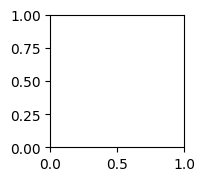

In [ ]:
# Generate samples from the generator
num_samples = 1000
generated_samples = generator.predict(np.random.normal(0, 1, size=(num_samples, input_dim)))
new_sample = {
    'duration': 0.584,
    'source_ip': '193.27.6.136',
    'destination_ip': '42.219.156.212',
    'source_port': 25,
    'destination_port': 57784,
    'protocol': 'TCP',
    'flag': '.AP.SF',
    'forwarding_status': 0,
    'tos': 0,
    'packets': 5,
    'bytes': 958
}

# Extract data from new_sample
duration = new_sample['duration']
source_ip = new_sample['source_ip']
destination_ip = new_sample['destination_ip']
source_port = new_sample['source_port']
destination_port = new_sample['destination_port']
protocol = new_sample['protocol']
flag = new_sample['flag']
forwarding_status = new_sample['forwarding_status']
tos = new_sample['tos']
packets = new_sample['packets']
bytes_ = new_sample['bytes']  # Use 'bytes_' instead of 'bytes' to avoid conflict with built-in name

# Visual inspection of generated samples
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(generated_samples[i].reshape(-1, 12), cmap='gray')  # Assuming each sample has shape (8, 8)
    plt.axis('off')
plt.show()

# You can compute additional evaluation metrics here if needed


In [ ]:
# Generate samples from the generator
num_samples = 1
generated_samples = generator.predict(np.random.normal(0, 1, size=(num_samples, input_dim)))

# Visual inspection of generated samples
plt.figure(figsize=(10, 10))
for i in range(1):
    plt.subplot(5, 5, i+1)
    plt.plot(generated_samples[i])  # Assuming each sample is a 1D array
    plt.title(f'Sample {i+1}')
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Value')
plt.tight_layout()
plt.show()

# Extract data from new_sample
duration = new_sample['duration']
source_ip = new_sample['source_ip']
destination_ip = new_sample['destination_ip']
source_port = new_sample['source_port']
destination_port = new_sample['destination_port']
protocol = new_sample['protocol']
flag = new_sample['flag']
forwarding_status = new_sample['forwarding_status']
tos = new_sample['tos']
packets = new_sample['packets']
bytes_ = new_sample['bytes']  # Use 'bytes_' instead of 'bytes' to avoid conflict with built-in name

# Extracted data from new_sample
duration = 0.584
source_ip = '193.27.6.136'
destination_ip = '42.219.156.212'
source_port = 25
destination_port = 57784
protocol = 'TCP'
flag = '.AP.SF'
forwarding_status = 0
tos = 0
packets = 5
bytes_ = 958

